## PREDICTION OF COVID-19 DIAGNOSIS BASED ON FEATURE IN DATASET

***OVERVIEW.***

**DATA DESCRIPTION**

This dataset appears to capture information related to COVID-19 testing or symptoms.


**DOMAIN**

Public HealthCare







**Feature:-**

1.***Ind_ID*** (Individual ID):- A unique identifier for each individual in the dataset.

2.***Test_date***:- The date when the test was conducted.

3.***Cough_symptoms***:- Indicates the presence or absence of cough symptoms.

4.***Fever***:- Indicates the presence or absence of fever.

5.***Sore_throat***:- Indicates the presence or absence of a sore throat.

6.***Shortness_of_breath***:- Indicates the presence or absence of shortness of breath.

7.***Headache***:- Indicates the presence or absence of a headache.

8.***Corona***:-#**TARGET VARAIBLE**- Related to the presence or absence of coronavirus. It might indicate test results or other relevant information.

9.***Age_60_above***:- Indicates whether the individual is 60 years old or above.

10.***Sex***:- Indicates the gender of the individual.

11.***Known_contact***:- Indicates whether there is known contact with someone who has coronavirus.



***Objective***

We want to see outcome of **COVID-19** test is either positive or negative based of given 11 features.

**Brief Flow of Project Steps:-**ZIP WORD DOC.

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

##**Importing Required Packages**

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from datetime import *

import warnings
warnings.filterwarnings("ignore")

## **Importing The Dataset & Exploratory Data Analysis**






In [ ]:
covid= pd.read_csv("/content/corona_tested_006.csv")
covid.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [ ]:
print(f"Number of rows= {covid.shape[0]} and Number of columns={covid.shape[1]} ")

Number of rows= 278848 and Number of columns=11 


In [ ]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [ ]:
print("Feature Indexes")
#fetch features labels in output
", ".join(covid.columns)


Feature Indexes


'Ind_ID, Test_date, Cough_symptoms, Fever, Sore_throat, Shortness_of_breath, Headache, Corona, Age_60_above, Sex, Known_contact'

In [ ]:
covid[covid.duplicated()]  #checking if any duplicate rows

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact


In [ ]:
covid.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

In [ ]:
print()
covid.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ind_ID,278848.0,NaN,NaN,NaN,139424.5,80496.628269,1.0,69712.75,139424.5,209136.25,278848.0
Test_date,278848,51,20-04-2020,10921,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cough_symptoms,278848,5,False,127531,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fever,278848,5,False,137774,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sore_throat,278848,5,False,212584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Shortness_of_breath,278848,5,False,212842,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Headache,278848,5,False,212326,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Corona,278848,3,negative,260227,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age_60_above,278848,3,None,127320,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,278848,3,female,130158,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
unique_value=covid.drop(columns=["Ind_ID","Test_date"])


#loop to fetch unique value of certain feature and thjheir count
#along with their Mode
for i in unique_value:
  print("========================")
  print(unique_value[i].value_counts())
  print("Most frequent value is:-",unique_value[i].mode().values)

False    127531
FALSE    108837
TRUE      21983
True      20245
None        252
Name: Cough_symptoms, dtype: int64
Most frequent value is:- [False]
False    137774
FALSE    119070
TRUE      11750
True      10002
None        252
Name: Fever, dtype: int64
Most frequent value is:- [False]
False    212584
FALSE     64337
TRUE       1198
True        728
None          1
Name: Sore_throat, dtype: int64
Most frequent value is:- [False]
False    212842
FALSE     64428
TRUE       1107
True        470
None          1
Name: Shortness_of_breath, dtype: int64
Most frequent value is:- [False]
False    212326
FALSE     64107
TRUE       1428
True        986
None          1
Name: Headache, dtype: int64
Most frequent value is:- [False]
negative    260227
positive     14729
other         3892
Name: Corona, dtype: int64
Most frequent value is:- ['negative']
None    127320
No      125703
Yes      25825
Name: Age_60_above, dtype: int64
Most frequent value is:- ['None']
female    130158
male      129127
None 

**OBSERVATION**

:-In columns
>'Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache'

We can observe column contain similar value conveying same meaning were entered in lower and upper case(True,TRUE).In all these features **"False" has occured most**.

:-In target feature "corona" we can look **3892** number of patients diagnosis is categorized as "**Other**", which we will drop as we want to classify patient report either **nagative** or **positive**.

:-In age column whether **age is above 60 or not**, majority of patient age is not classified.Either the age was not entered or not told by patient itself.

In [ ]:
column=['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache']

#replacing Similar case values in capitalioze form
#Imputing Null(denoted as none) with mode
for i in column:
  covid[i] = covid[i].replace({'TRUE':True,'FALSE':False,'True':True,'False':False,'None':False}).astype("object")

*Above in list of column we observe similar value were present in Upper and lower cases. Using (.replace()) pandas method we replaced value to similar form.*

>Imputation

*Also 'NONE' entry in features is replaced by most_frequent occuring value i.e, 'False' and further we again switch columns data type back to 'Object'.*

In [ ]:
covid.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

In [ ]:
covid.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ind_ID,278848.0,NaN,NaN,NaN,139424.5,80496.628269,1.0,69712.75,139424.5,209136.25,278848.0
Test_date,278848,51,20-04-2020,10921,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cough_symptoms,278848,2,False,236620,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fever,278848,2,False,257096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sore_throat,278848,2,False,276922,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Shortness_of_breath,278848,2,False,277271,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Headache,278848,2,False,276434,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Corona,278848,3,negative,260227,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age_60_above,278848,3,None,127320,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,278848,3,female,130158,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
covid=covid[covid["Corona"] != "other"]
#3982 rows are removed which were classified as "Other"

In [ ]:
covid["Test_date"].value_counts()

20-04-2020    10815
19-04-2020    10119
21-04-2020     9483
22-04-2020     9422
16-04-2020     9066
01-04-2020     8585
23-04-2020     8539
02-04-2020     8107
03-04-2020     7993
13-04-2020     7900
05-04-2020     7451
17-04-2020     7436
30-04-2020     7269
27-04-2020     7247
31-03-2020     7080
15-04-2020     7066
24-04-2020     6985
14-04-2020     6491
26-03-2020     6481
28-04-2020     6267
18-04-2020     6253
26-04-2020     6078
07-04-2020     5897
12-04-2020     5888
30-03-2020     5862
27-03-2020     5809
10-04-2020     5611
28-03-2020     5518
25-03-2020     5411
06-04-2020     5341
29-03-2020     5216
04-04-2020     5088
25-04-2020     5029
24-03-2020     4670
09-04-2020     4523
11-04-2020     4277
29-04-2020     4231
08-04-2020     4020
22-03-2020     3528
23-03-2020     3445
19-03-2020     2222
18-03-2020     1957
20-03-2020     1853
21-03-2020     1639
17-03-2020     1429
16-03-2020     1265
15-03-2020      891
13-03-2020      682
12-03-2020      630
14-03-2020      605


***Visualizing the data***

**Univariate & Multivariate**

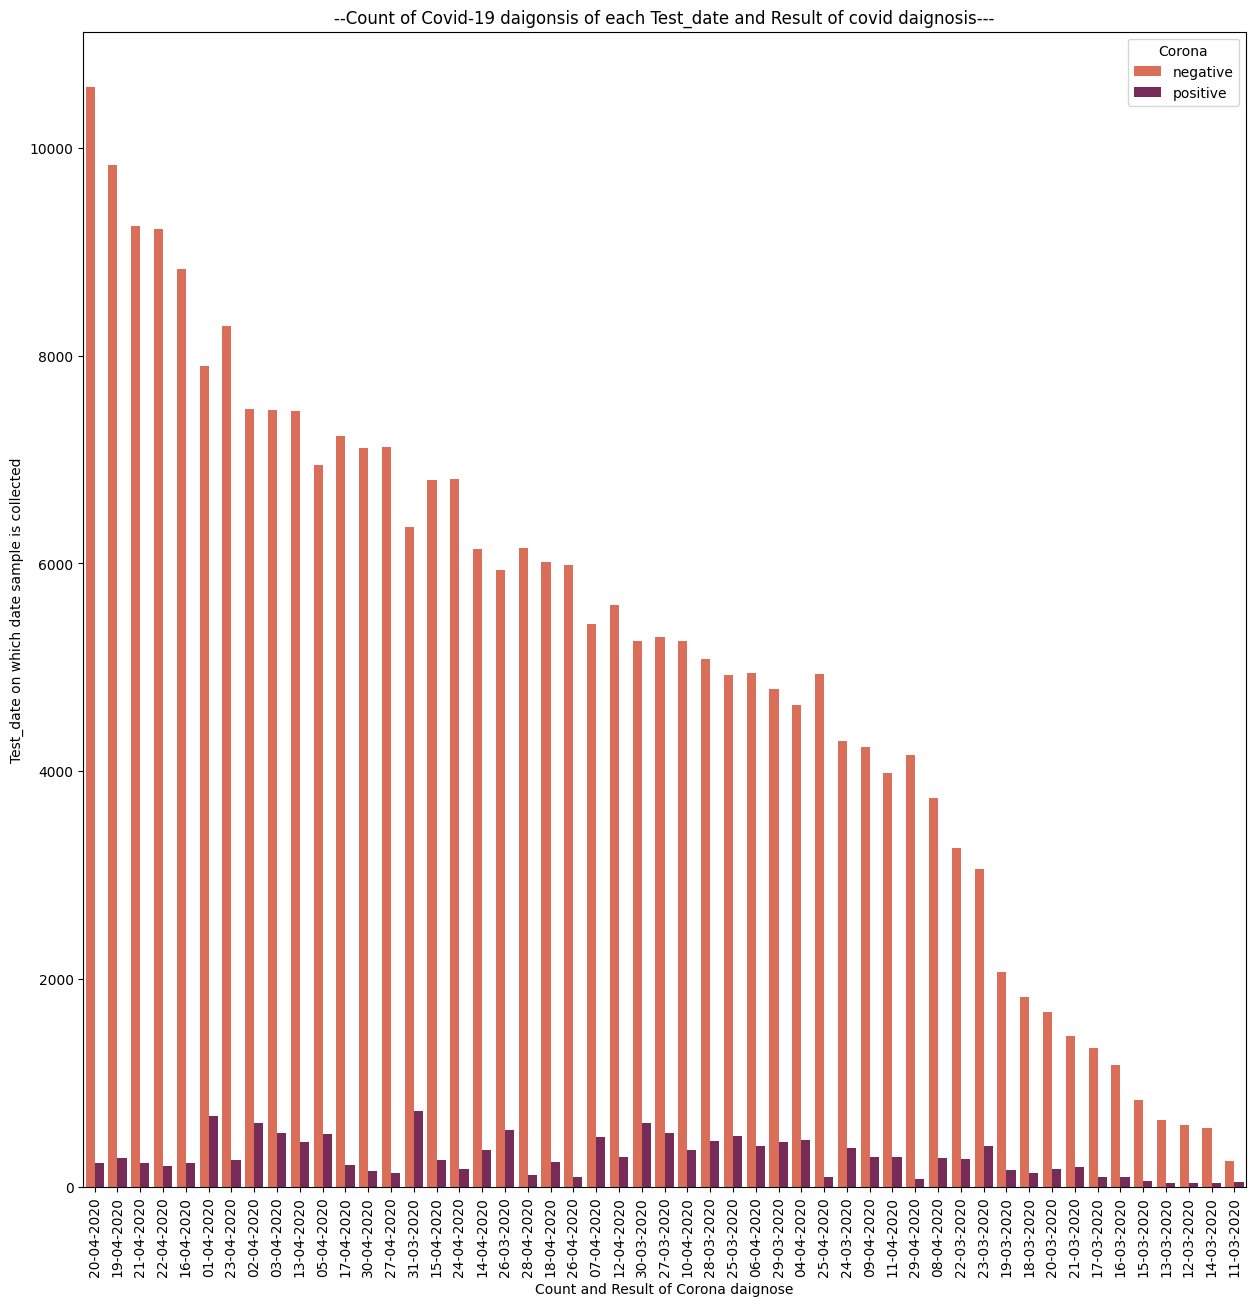

In [ ]:
plt.figure(figsize=(15,15))

sns.countplot(data=covid,x="Test_date",hue="Corona",order=covid["Test_date"].value_counts().index,palette="rocket_r")
plt.title("--Count of Covid-19 daigonsis of each Test_date and Result of covid daignosis---")
plt.ylabel("Test_date on which date sample is collected")
plt.xlabel("Count and Result of Corona daignose")

plt.xticks(rotation="vertical")

plt.show()


Most number of sample was collected on date "20-04-2020",nearly **11 thousand**
 test.Here test_date conveys count of samples collected on date and majority of test reported **negative**.

Chart is plotted in decending order of value_count order from left to right. Despite what size of diagnose sample taken, volume of negative reports is comparatively very larger than positive reports **for each date**.we can observe people covid test outcome is not influenced by the diagnosis date.

on date:-20th, 30th April samples taken were very high but positive report is very low as compared to  date:-23th,4th April samples taken were very less than 20th,30th but people reported positive is very high.So, such observation help to understand that column "Test_date" isn't significant in predicting the report of people.


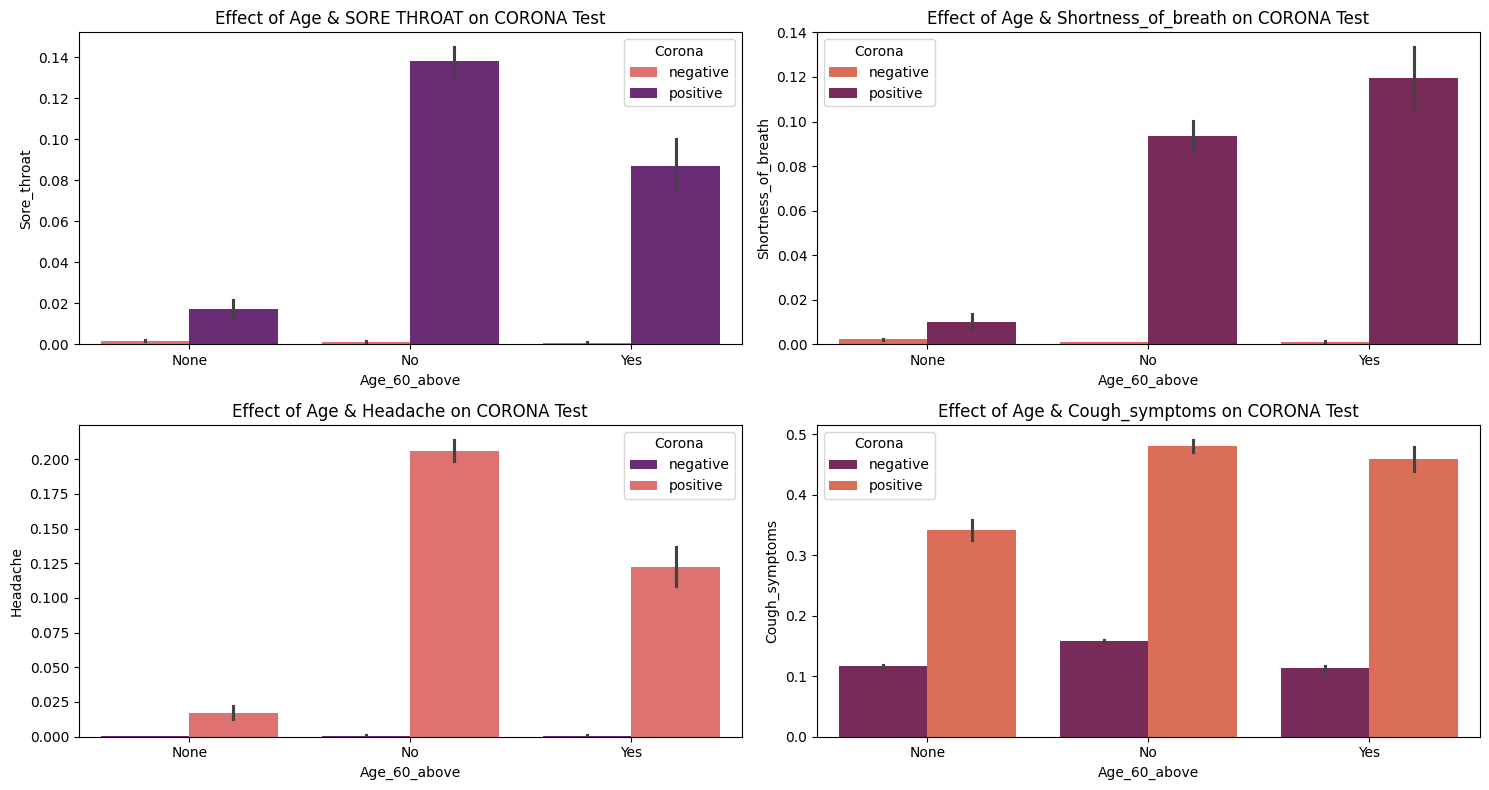

In [ ]:
#plotting 4 chart.2x2
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(15, 8))

sns.barplot(data=covid, x="Age_60_above", y="Sore_throat", hue="Corona", ax=axes[0, 0],palette="magma_r")
axes[0,0].set_title("Effect of Age & SORE THROAT on CORONA Test")

sns.barplot(data=covid, x="Age_60_above", y="Shortness_of_breath", hue="Corona", ax=axes[0, 1],palette="rocket_r")
axes[0,1].set_title("Effect of Age & Shortness_of_breath on CORONA Test")

sns.barplot(data=covid, x="Age_60_above", y="Headache", hue="Corona", ax=axes[1, 0],palette="magma")
axes[1,0].set_title("Effect of Age & Headache on CORONA Test")

sns.barplot(data=covid, x="Age_60_above", y="Cough_symptoms", hue="Corona", ax=axes[1, 1],palette="rocket")
axes[1,1].set_title("Effect of Age & Cough_symptoms on CORONA Test")


plt.tight_layout()

plt.show()

In [ ]:
pd.crosstab(covid["Known_contact"],covid['Corona'])

Corona,negative,positive
Known_contact,,
Abroad,23205,1869
Contact with confirmed,3160,7318
Other,233862,5542



>***category Other than*** **Abroad,Confirmed_with_contact.** ***Majority people contact is either unknown or classified as "other".***

>**Out of total positive reports ∼49% of cases are "confirmed with contact".So we can say "known_contact" feature have significant impact in predicting covid-19 presence**

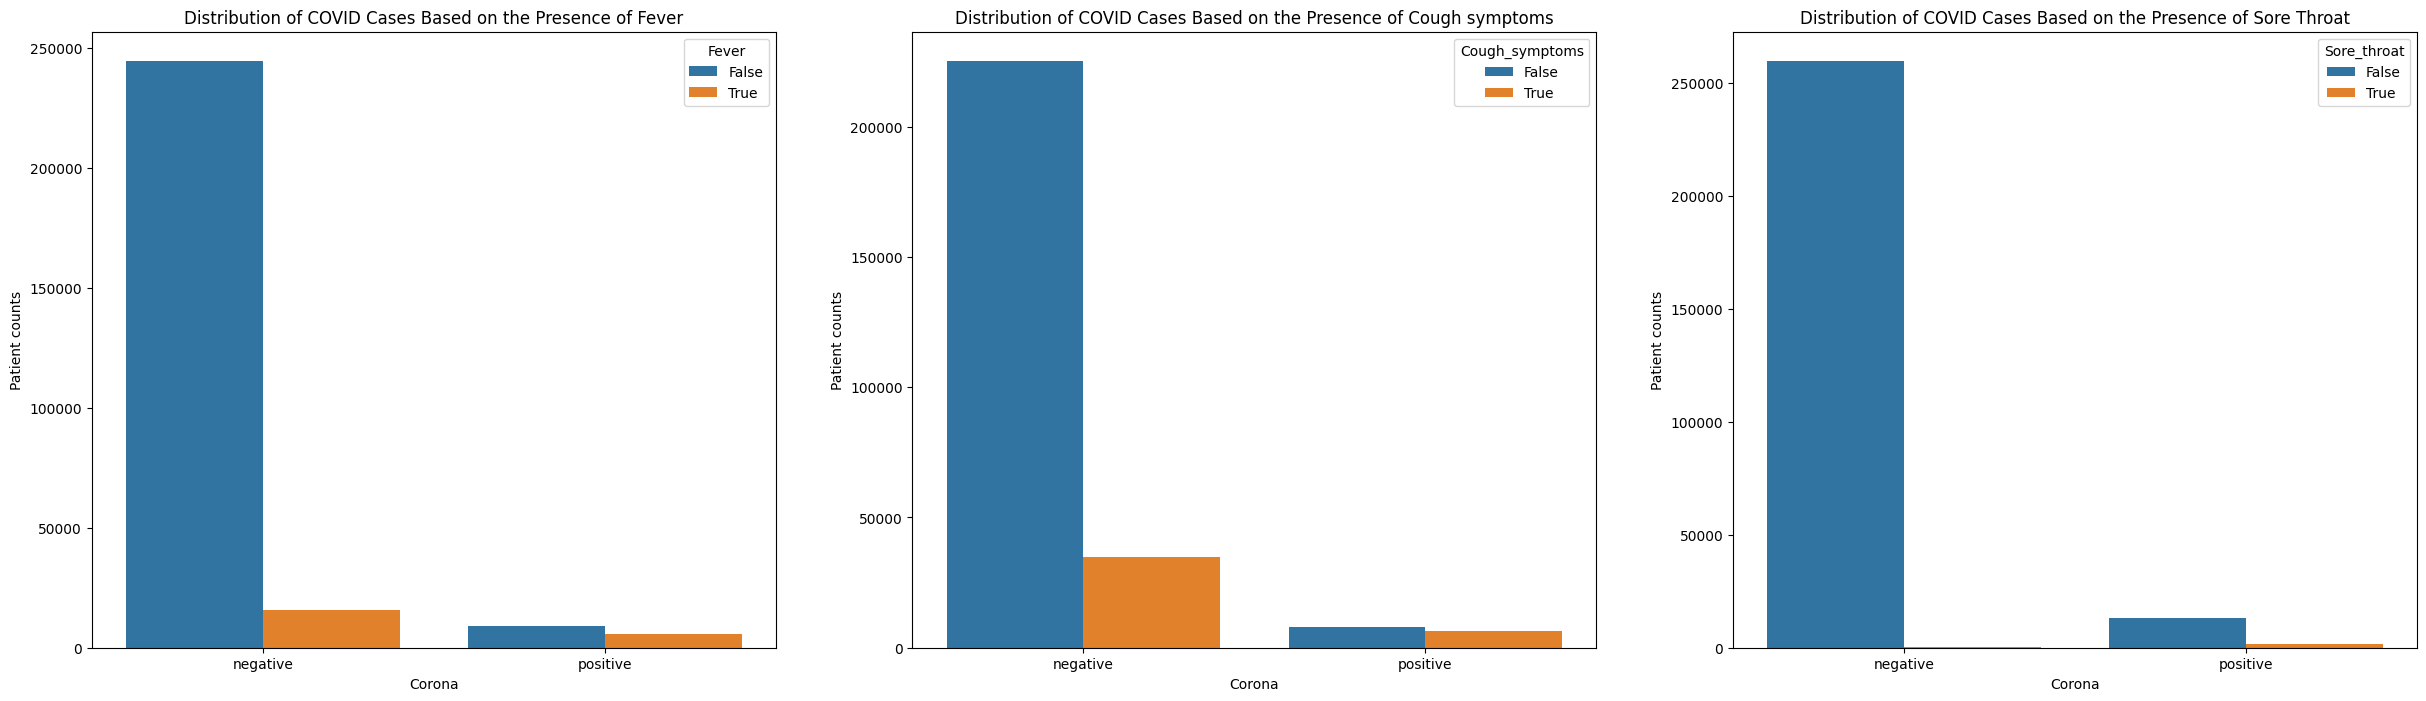

In [ ]:
plt.figure(figsize=(30,8))

plt.subplot(1,3,1)
sns.countplot(data=covid,x="Corona",hue="Fever")
plt.title("Distribution of COVID Cases Based on the Presence of Fever")
plt.ylabel("Patient counts")

plt.subplot(1,3,2)
sns.countplot(data=covid,x="Corona",hue="Cough_symptoms")
plt.title('Distribution of COVID Cases Based on the Presence of Cough symptoms')
plt.ylabel("Patient counts")

plt.subplot(1,3,3)
sns.countplot(data=covid,x="Corona",hue="Sore_throat")
plt.title("Distribution of COVID Cases Based on the Presence of Sore Throat")
plt.ylabel("Patient counts")

plt.show()

In [ ]:
pd.crosstab(covid["Sex"],covid["Corona"])

Corona,negative,positive
Sex,,
None,17876,1169
female,122500,6041
male,119851,7519


>**Out of total male ∼6.2% males are positive and total female ∼4.2% female are positive. Also out of total positive cases we can surely conclude that ∼41% female and ∼51% males are positive**

There are roughly 19 thousand unknown gender.So, either imputing them or removing null rows can be done.

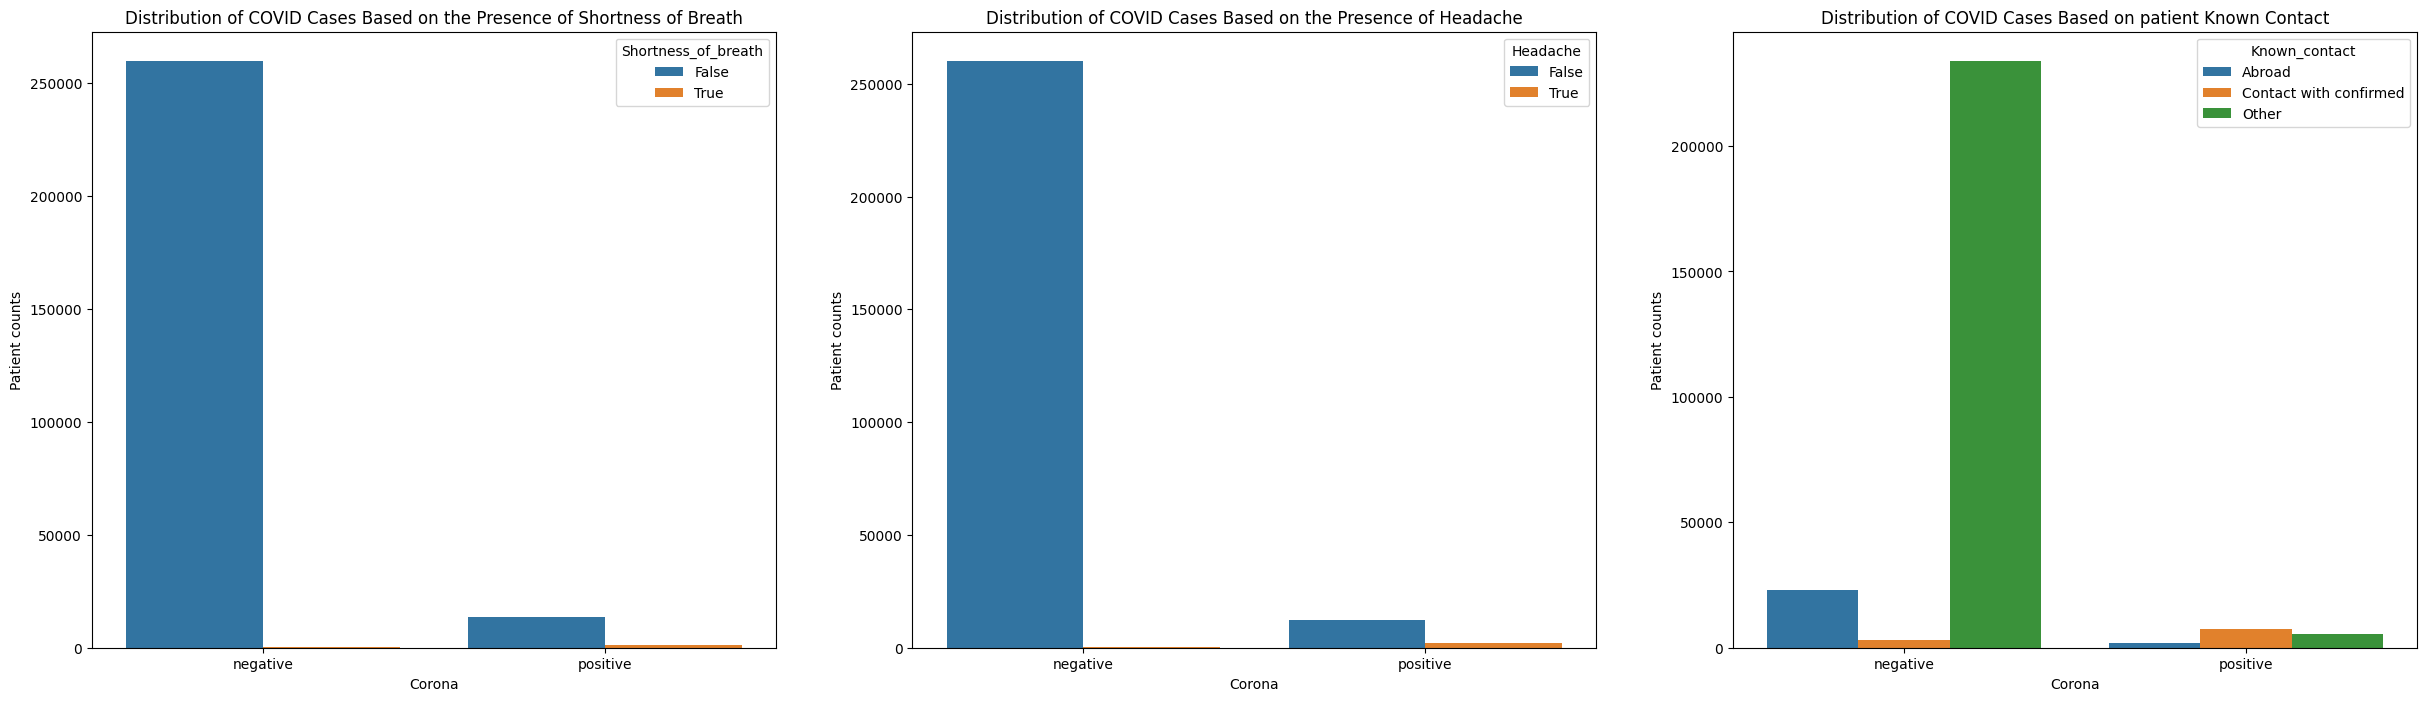

In [ ]:
plt.figure(figsize=(30, 8))

plt.subplot(1, 3, 1)
sns.countplot(data=covid, x="Corona", hue="Shortness_of_breath")
plt.title("Distribution of COVID Cases Based on the Presence of Shortness of Breath")
plt.ylabel("Patient counts")

plt.subplot(1, 3, 2)
sns.countplot(data=covid, x="Corona", hue="Headache")
plt.title('Distribution of COVID Cases Based on the Presence of Headache')
plt.ylabel("Patient counts")

plt.subplot(1, 3, 3)
sns.countplot(data=covid, x="Corona", hue="Known_contact")
plt.title("Distribution of COVID Cases Based on patient Known Contact")
plt.ylabel("Patient counts")

plt.show()

In [ ]:
pd.crosstab(covid["Age_60_above"],covid["Known_contact"]).T

Age_60_above,No,None,Yes
Known_contact,,,
Abroad,13734,9586,1754
Contact with confirmed,6844,2557,1077
Other,103289,113521,22594


**Observation**

>More people gone to abroad who are below 60.

>From chart and above table we can surely say people reported positive mostly with "confirmed_contact". Moreover,it can be infered that most among them is below 60.

>Contact information  of huge population is unknown or classified as "other".Mostly are below 60.

______________________________________________________________________________________________________________________________________________________________________________________________________

>>>>>>**CONCLUSION**

1.Number of people tested **negative** is higher than the number of patient reported **positive**.In dataset **∼93%** of total entries are Negative.

2.Number of people tested positive who got symptoms like **Headache,Sore-throat,Shortness of breath** is very less compared to number of  positively reported people who did not get symptoms like **Headache,Sore-throat,Shortness of breath**.

3.Number of positive reported People who got "**Fever and cough like symptoms** is almost equal in number of people who had not these symptoms.Also a significant number of people who negatively reported had symptoms like Fever,Headache.

4.In known_contact positive reported people by 'confirmed contact' is higher than other.

5.Number of males tested positive is higher while most number of people tested who negative are females.

6.Positively reported people who got "Headache,Sore Throat and less than 60" are higher in numbers than those who are above 60.

7.More People with age above 60 and shortness of breath reported positive than others.

8.Also we can observe that distribution of data in features is highly imbalance.

Thereby,Number of people with symptoms reported negative is higher than that of positive.Which imply that single symptom aren't enough to predict.

Furthermore, Feature age(whether above 60 or not) contains most null value but as we can see people with various symptoms less or more than 60 reported positive.So, it could be important feature to predict.

## Hypothesis Testing and Feature Engeering

**A**·*Does positively reported male is significantly differ from postively reported female*?

**-Hypotheses Hₒ and Hₐ:-**
>>◇**Hₒ** :-**Gender is not important in predicting COVID-19 presence**  
>>◇**Hₐ** :-**Gender is important in predicting COVID-19 presence**

**-Significance/Threshold Level: ALPHA: 0.05**

**-Indentity test-statistics.Firstly by dropping none value and secondly by imputing none value with mode**

**In general to support null hypothesis a link of research attach**
[link text](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7786186/)

**In summary**:

-**Infection rates (getting infected) may not show a significant gender difference**.
**However, the severity and fatality rates of COVID-19 tend to be higher in males compared to females.**

### Calculate p_value by appplying Chi-square test.

In [ ]:
drop_null=covid.copy()
fill_null=covid.copy()

In [ ]:
#copy of main set.We will drop gender=="None"
drop_null= drop_null[drop_null["Sex"] != "None"]

In [ ]:
table=pd.crosstab(drop_null["Sex"],drop_null["Corona"])
table

Corona,negative,positive
Sex,,
female,122500,6041
male,119851,7519


In [ ]:
#FIRST
#import scipy package to perform chi square test
from scipy.stats import chi2_contingency


#( _) to unpack the column
chi_value,p_value, _, _= chi2_contingency(table)

print("Chi2_statistics:-",chi_value)
print("p_value:-",p_value)

Chi2_statistics:- 184.458154297507
p_value:- 5.153336597970962e-42


In [ ]:
reject_null= False
if p_value < 0.05:
  reject_null =True
else:
  reject_null=False
print("Reject_null=",reject_null)

Reject_null= True


In [ ]:
#second
#replacing none classified value with most frequnet(mode) i.e, female.
fill_null["Sex"]=fill_null["Sex"].replace({"female":"female","male":"male","None":"female"})

In [ ]:
table2=pd.crosstab(fill_null["Sex"],fill_null["Corona"])
table2

Corona,negative,positive
Sex,,
female,140376,7210
male,119851,7519


In [ ]:
from scipy.stats import chi2_contingency

chi2_value,p2_value, _, _= chi2_contingency(table2)

print('Chi_statistics:-',chi2_value)
print("p_value:-",p2_value)

Chi_statistics:- 139.54358298541194
p_value:- 3.349829634729112e-32


In [ ]:
reject_null= False
if p2_value < 0.05:
  reject_null =True
else:
  reject_null=False
print("Reject_null=",reject_null)

Reject_null= True


**After dropping and imputing none value data is balanced between number of positively reported male and female**

**Chi-Square Statistic:**

1.Dropping Null Values: 184.46

2.Imputing Null Values with Mode (Female): 139.54

And **p_value in both cases is largely smaller than 0.05**. So,we will continue with imputation of "None Classified" values.

**As, a higher chi-square value, along with a small p-value, suggests a stronger association between the variables being tested in the chi-square analysis.**

-------------------------------------------------------------------------------------------------------------------------------------------------------------------

**B·Is there association between the "Age_60_above" column and the "Corona" variable?**

**-Hypotheses Hₒ and Hₐ:-**

>>◇**Hₒ** :-*Age_60_above and Corona are independent.*

>>◇**Hₐ** :-*Age_60_above and Corona are dependent*

**-Significance/Threshold Level: ALPHA: 0.05**

**-Indentity test-statistics:Chi-square**

**In given feature we check impact of 60<age<60 with known given values**

In [ ]:
pd.crosstab(covid["Age_60_above"],covid["Corona"])

Corona,negative,positive
Age_60_above,,
No,114602,9265
None,122404,3260
Yes,23221,2204


**Observation**

-**Positively reported-**Number of people above 60 are very less compare to number of people below 60.
>**But confirmed  9.4%  people above 60 and  8.2%  people below 60 and  2%  people of unknown age group reported positive given number of negative for that group**.**Also overall negative cases are significantly larger than the positive, indicating an imbalance data.**

.Number of entries(roughly43%) don't tell about people age group and classified as "none".Dropping may lead to loss of big amount of sigificant data or imputing with mode such amount of data may cause bais result in further studies.



In [ ]:
cov=covid[covid["Age_60_above"] != "None"]
table=pd.crosstab(cov["Age_60_above"],cov["Corona"])
table

Corona,negative,positive
Age_60_above,,
No,114602,9265
Yes,23221,2204


In [ ]:
from scipy.stats import chi2_contingency

chi_val,p_val, _, _= chi2_contingency(table)

print('Chi_statistics:-',chi_val)
print("p_value:-",p_val)

Chi_statistics:- 41.87131056629777
p_value:- 9.748250884873129e-11


In [ ]:
reject_null= False
if p_val < 0.05:
  reject_null =True
else:
  reject_null=False
print("Reject_null=",reject_null)

Reject_null= True


**Chi-Square Statistic:**

>**value= 30.1734** and **p_value** is very less than threshold

>**P_value >0.05 signifies we have to reject null hypothesis**

>**Chi stat value which tells about difference between observed frequency and excepted frequency is not very high.Higher the chi2 value higher the relation between varaibles**

>**considering given observation and errors we can either impute none with mode or drop it from set**

***Important points to consider regarding covid and age of person***

1.The novel coronavirus is a new virus that can infect all age groups.

2.However, severity and mortality of COVID-19 is immensely depends on
pre-existing medical conditions of a person(such as old age,high blood pressure, heart disease, lung disease, cancer or diabetes) appear to develop serious illness more often than others.

***◇◇*** ***From Obsevation we can say that if "none" value are replaced with most occuring value.The number of positive cases below 60 will be 5% while above 60 will 9%.**
>>***such action convey's despite very small size of test collection of above 60 people ,positively reported people are high as compared to below 60. Which apparently increase baised and false negative and false positive when actually we actually aren't sure of age of person***  

**3.Thus,in given set feature may show significant impact on report because of imbalance distribution and larger unknown value.But spread of virus among specific age group people is high or low can't be justified surely with available features of dataset**

4.considering these point further we train model with or without this feature in our set.

5.Additinally, infection of covid is disappropriately spread in different age groups.Example number of positively middle age adults  is very high than childrens, seniors citizens because of jobs,working or beign out in field.[link text](https://www.sciencedirect.com/science/article/pii/S2213398421001858)


In [ ]:
#covid dataset for sql part
#cov_sql=covid.copy()
#cov_sql["Sex"]= cov_sql["Sex"].replace({"female":"female","male":"male","None":"female"})

In [ ]:
#covid dataset for Modelling part
df=covid.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274956 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               274956 non-null  int64 
 1   Test_date            274956 non-null  object
 2   Cough_symptoms       274956 non-null  object
 3   Fever                274956 non-null  object
 4   Sore_throat          274956 non-null  object
 5   Shortness_of_breath  274956 non-null  object
 6   Headache             274956 non-null  object
 7   Corona               274956 non-null  object
 8   Age_60_above         274956 non-null  object
 9   Sex                  274956 non-null  object
 10  Known_contact        274956 non-null  object
dtypes: int64(1), object(10)
memory usage: 25.2+ MB


In [ ]:
#imputing "none" value of gender with mode i.e, female
df["Sex"]= df["Sex"].replace({"female":"female","male":"male","None":"female"})
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ind_ID,274956.0,NaN,NaN,NaN,139523.837338,80520.445132,1.0,69841.75,139230.5,209257.25,278848.0
Test_date,274956,51,20-04-2020,10815,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cough_symptoms,274956,2,False,233385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fever,274956,2,False,253581,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sore_throat,274956,2,False,273064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Shortness_of_breath,274956,2,False,273407,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Headache,274956,2,False,272573,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Corona,274956,2,negative,260227,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age_60_above,274956,3,None,125664,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,274956,2,female,147586,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**In given set of columns**
>**Cough_symptoms, Fever, Sore_throat, Shortness_of_breath, Headache, Sex, Known_contact,Age_60_above**
**are nominal values.**

**Target varaible is CORONA** and **Test_date** **both are orinal value**

**Nominal Encoding**

In [ ]:
column=['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Sex', 'Known_contact']

df=pd.get_dummies(data=df,columns=column,drop_first=True)

In [ ]:
df.head()

,Ind_ID,Test_date,Corona,Age_60_above,Cough_symptoms_True,Fever_True,Sore_throat_True,Shortness_of_breath_True,Headache_True,Sex_male,Known_contact_Contact with confirmed,Known_contact_Other
0,1,11-03-2020,negative,None,1,0,1,0,0,0,0,0
1,2,11-03-2020,positive,None,0,1,0,0,0,0,0,0
2,3,11-03-2020,positive,None,0,1,0,0,0,0,0,0
3,4,11-03-2020,negative,None,1,0,0,0,0,0,0,0
4,5,11-03-2020,negative,None,1,0,0,0,0,0,1,0


**Label Encoding of target value**

In [ ]:
#from sklearn package calling label encoder class
from sklearn.preprocessing import LabelEncoder

#object of label encoder class
le= LabelEncoder()
df["Corona"]= le.fit_transform(df["Corona"])

In [ ]:
df.head(2)

,Ind_ID,Test_date,Corona,Age_60_above,Cough_symptoms_True,Fever_True,Sore_throat_True,Shortness_of_breath_True,Headache_True,Sex_male,Known_contact_Contact with confirmed,Known_contact_Other
0,1,11-03-2020,0,None,1,0,1,0,0,0,0,0
1,2,11-03-2020,1,None,0,1,0,0,0,0,0,0


In [ ]:
df.isnull().sum()

Ind_ID                                  0
Test_date                               0
Corona                                  0
Age_60_above                            0
Cough_symptoms_True                     0
Fever_True                              0
Sore_throat_True                        0
Shortness_of_breath_True                0
Headache_True                           0
Sex_male                                0
Known_contact_Contact with confirmed    0
Known_contact_Other                     0
dtype: int64

In [ ]:
#incase:-half prepared dataset with imputed null value of age

#df_age=df.copy()
#df_age["Age_60_above"]=df_age["Age_60_above"].replace({"Yes":"Yes","No":"No","None":"No"})

In [ ]:
#dropping column before split
df=df.drop(columns=["Ind_ID","Age_60_above"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274956 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column                                Non-Null Count   Dtype 
---  ------                                --------------   ----- 
 0   Test_date                             274956 non-null  object
 1   Corona                                274956 non-null  int64 
 2   Cough_symptoms_True                   274956 non-null  uint8 
 3   Fever_True                            274956 non-null  uint8 
 4   Sore_throat_True                      274956 non-null  uint8 
 5   Shortness_of_breath_True              274956 non-null  uint8 
 6   Headache_True                         274956 non-null  uint8 
 7   Sex_male                              274956 non-null  uint8 
 8   Known_contact_Contact with confirmed  274956 non-null  uint8 
 9   Known_contact_Other                   274956 non-null  uint8 
dtypes: int64(1), object(1), uint8(8)
memory usage: 8.4+ MB


## ***Splitting data into Train , Validation, Test set***

**Splitting In Train,Test for model training and evaluation. Further Train set is divided into Train abd validation_set(4:1).**

In [ ]:
#convert str date into datetime format(yyyy-mm-dd)
df["Test_date"]=pd.to_datetime(df["Test_date"])
df["Test_date"].head()

0   2020-11-03
1   2020-11-03
2   2020-11-03
3   2020-11-03
4   2020-11-03
Name: Test_date, dtype: datetime64[ns]

In [ ]:
#Date range for train ,validation and test

train_start= "2020-03-11"
train_end= "2020-04-15"
test_start= "2020-04-16"
test_end= "2020-04-30"

In [ ]:
#Filtered Datasets based condition
train_set= df[(df["Test_date"] >= train_start) & (df["Test_date"]<= train_end)]

test= df[(df["Test_date"] >= test_start) &  (df["Test_date"]<= test_end)]


In [ ]:
#Train and validation set
#lenght of set is calculated and then multiplied by 0.8(80%).
#so varaible 'separate' 80% of train set data leght

separate= int(0.8 * len(train_set))

#now using iloc we will store data from start to 80% in train and from 80% to end in valid
#    4:1
train= train_set.iloc[:separate]
valid= train_set.iloc[separate:]

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73686 entries, 928 to 144173
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Test_date                             73686 non-null  datetime64[ns]
 1   Corona                                73686 non-null  int64         
 2   Cough_symptoms_True                   73686 non-null  uint8         
 3   Fever_True                            73686 non-null  uint8         
 4   Sore_throat_True                      73686 non-null  uint8         
 5   Shortness_of_breath_True              73686 non-null  uint8         
 6   Headache_True                         73686 non-null  uint8         
 7   Sex_male                              73686 non-null  uint8         
 8   Known_contact_Contact with confirmed  73686 non-null  uint8         
 9   Known_contact_Other                   73686 non-null  uint8         


In [ ]:
valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18422 entries, 144174 to 163188
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Test_date                             18422 non-null  datetime64[ns]
 1   Corona                                18422 non-null  int64         
 2   Cough_symptoms_True                   18422 non-null  uint8         
 3   Fever_True                            18422 non-null  uint8         
 4   Sore_throat_True                      18422 non-null  uint8         
 5   Shortness_of_breath_True              18422 non-null  uint8         
 6   Headache_True                         18422 non-null  uint8         
 7   Sex_male                              18422 non-null  uint8         
 8   Known_contact_Contact with confirmed  18422 non-null  uint8         
 9   Known_contact_Other                   18422 non-null  uint8       

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114239 entries, 163189 to 278847
Data columns (total 10 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   Test_date                             114239 non-null  datetime64[ns]
 1   Corona                                114239 non-null  int64         
 2   Cough_symptoms_True                   114239 non-null  uint8         
 3   Fever_True                            114239 non-null  uint8         
 4   Sore_throat_True                      114239 non-null  uint8         
 5   Shortness_of_breath_True              114239 non-null  uint8         
 6   Headache_True                         114239 non-null  uint8         
 7   Sex_male                              114239 non-null  uint8         
 8   Known_contact_Contact with confirmed  114239 non-null  uint8         
 9   Known_contact_Other                   114239 non-null 

In [ ]:
#now drop date column from each set
train= train.drop(columns=["Test_date"])
valid= valid.drop(columns=["Test_date"])
test= test.drop(columns=["Test_date"])

**Now we have splitted data. We will use set-Train,Validation,Test as follows:-**
>**◇Train set-**To make model learn pattern

>**◇Valid set-**To evaluate model

>**◇Test set-**To re-evaluate model performance after feature tuning

In [ ]:
#further split for,independent and dependent set for training and test

X_train,y_train= train.drop(columns=["Corona"]), train["Corona"]
X_valid,y_valid= valid.drop(columns=["Corona"]), valid["Corona"]

In [ ]:
X_train.head(2)

,Cough_symptoms_True,Fever_True,Sore_throat_True,Shortness_of_breath_True,Headache_True,Sex_male,Known_contact_Contact with confirmed,Known_contact_Other
928,0,0,0,0,0,0,0,1
929,0,0,0,0,0,0,0,1


In [ ]:
y_train.head(2)

928    0
929    0
Name: Corona, dtype: int64

In [ ]:
X_valid.head(2)

,Cough_symptoms_True,Fever_True,Sore_throat_True,Shortness_of_breath_True,Headache_True,Sex_male,Known_contact_Contact with confirmed,Known_contact_Other
144174,0,0,0,0,0,0,0,1
144175,0,0,0,0,0,1,0,1


In [ ]:
y_valid.head(2)

144174    0
144175    0
Name: Corona, dtype: int64

**From sklearn package importing models classes and metrics**

In [ ]:
from sklearn.linear_model import  LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,roc_curve,auc,roc_auc_score

In [ ]:
#initializing dictionary to make object of each selected model classes
mod={"logistics_reg":LogisticRegression(),"Decision_tree":DecisionTreeClassifier(),"Random_forest":RandomForestClassifier(),
     "knn":KNeighborsClassifier(),"XGB_class":XGBClassifier(),"svm":SVC()}

metric=["accuracy","precision","recall","f1","confusion_mat"]
#empty dictionary to store evaluated score
output= {}
for name,model in mod.items():

  model.fit(X_train, y_train)
  #evaluation of valid set on trained value
  y_pred_valid= model.predict(X_valid)

  met={}
  for i in metric:
    if i=="confusion_mat":
      met[i]= confusion_matrix(y_valid,y_pred_valid)
    elif i == "accuracy":
      met[i] = round(accuracy_score(y_valid,y_pred_valid),6)
    elif i == "precision":
      met[i]= round(precision_score(y_valid,y_pred_valid),6)
    elif i=="recall":
      met[i]= round(recall_score(y_valid,y_pred_valid),6)
    elif i=="f1":
      met[i]= round(f1_score(y_valid,y_pred_valid),6)

  output[name]= met

serial_number = 0
for name,met in output.items():
  serial_number += 1
  print("--------------------------------")
  print(f"{serial_number}.Name of model :- {name}")
  print(f"-Validation Score = {met}")
  print("________________________________")
  print()

--------------------------------
1.Name of model :- logistics_reg
-Validation Score = {'accuracy': 0.960971, 'precision': 0.687783, 'recall': 0.343503, 'f1': 0.458176, 'confusion_mat': array([[17399,   138],
       [  581,   304]])}
________________________________

--------------------------------
2.Name of model :- Decision_tree
-Validation Score = {'accuracy': 0.957225, 'precision': 0.580431, 'recall': 0.39548, 'f1': 0.47043, 'confusion_mat': array([[17284,   253],
       [  535,   350]])}
________________________________

--------------------------------
3.Name of model :- Random_forest
-Validation Score = {'accuracy': 0.957225, 'precision': 0.580431, 'recall': 0.39548, 'f1': 0.47043, 'confusion_mat': array([[17284,   253],
       [  535,   350]])}
________________________________

--------------------------------
4.Name of model :- knn
-Validation Score = {'accuracy': 0.957714, 'precision': 0.657738, 'recall': 0.249718, 'f1': 0.361998, 'confusion_mat': array([[17422,   115],
     

**We Have trained 6 models**
>*OUR AIM IS TO PREDICT WHETHER PERSON IS REPORTED POSITIVE OR NEGATIVE*

According to our aim , we need our model to predict better True(positive and negative).Since data is imbalance and related to medical domain we will prefer "precison and recall".

**-From above all model are performing similarly in all aspect**


**Considering conditions we will choose RandomForestClassifier and XGBoost_classifier for further tuning and cross validation becasue we want it to predict better True positive and True negative and comparatively high scores**



_______________________________________________________________________________________________________________

>>1.***Chosen Model: Random Forest Classifier***



.*Ensemble Technique:*
>Random Forest is an ensemble method, robust in handling complex relationships and reducing overfitting by averaging multiple decision trees and is less sensitive to noise and outliers in the data.



.*Feature Importance:*

>Provides feature importance, allowing identification of critical variables.Also when given feature aren't enough to gain proper insight of actual cause

.*Handling Imbalanced Data:*

>Given corono_test set is imbalanced and moderate size. Random Forest can handle imbalanced datasets well, which is common in medical datasets. Due to high accuracy, robustness, feature importance, versatility, and scalability.

................................................................................................................................................................................................................................................

>>2.***Chosen Model: XGBoost_classifier***

*.Prevent Overfitting*

>XGBoost has built-in regulization term L1(LASSO) and L2(RIDGE) which prevent overfitting by penalizing large coffiecients.

.*Gradient Boosting*

>It build model squentailly.The model is trained to correct previous model errors which leads strong predictive performance.

.*Flexibilty*

>XGBoost supports various objective functions making it adaptable to different types of problems. It is useful for both classification and regression tasks, and it supports custom evaluation metrics.

___________________________________________________________________________________________________________________________________

In [ ]:
# Assuming X_test, y_test  features and target variables for the test set
X_test, y_test = test.drop("Corona", axis=1), test["Corona"]

# Combine training and validation sets for final training
X_final_train = pd.concat([X_train, X_valid])
y_final_train = pd.concat([y_train, y_valid])

>**Cross_validation k-fold and HyperParameter tuning.**

>**Mian aim to improve "recall_score(Senstivity), precision". So,as to improve model ability to predict better TRUE instances.**

>**Random_Forest_Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rc=RandomForestClassifier()
rc.fit( X_final_train,y_final_train)

RandomForestClassifier()

In [ ]:
from sklearn.model_selection import cross_val_score

cv_score= cross_val_score(rc, X_final_train,y_final_train, scoring="recall",cv=5)

print("Recall score:",cv_score)
print()
print("Average Recall score:,",round(cv_score.mean(),4))

Recall score: [0.6471399  0.6446281  0.66046832 0.6505858  0.4417643 ]

Average Recall score:, 0.6089


**Randomised Search CV**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

#defining parameter of random search.Including depth of tree,minimum sample for split internal node and min_leaf for leaf split
#passing higher is beneficial but it will computationally very heavy
param={"n_estimators":[100,200,300],"max_depth":[10,20,30],"min_samples_split":[2,6,10],"min_samples_leaf":[1,3,5]}

r_search= RandomizedSearchCV(rc, param_distributions=param,scoring="recall",cv=5,n_iter=5,verbose=2)

r_search.fit(X_final_train,y_final_train)
print(r_search.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END max_depth=20, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   1.9s
[CV] END max_depth=20, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   1.8s
[CV] END max_depth=20, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   2.8s
[CV] END max_depth=20, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   2.8s
[CV] END max_depth=20, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   1.7s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=6, n_estimators=300; total time=   5.2s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=6, n_estimators=300; total time=   6.0s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=6, n_estimators=300; total time=   5.2s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=6, n_estimators=300; total time=   6.0s
[CV] END max_depth=30, min_samp

In [ ]:
final_model= r_search.best_estimator_

#evaluating final predicting value from model
y_pred= final_model.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print("Confusion Matrix")
confusion_matrix(y_test,y_pred)

Confusion Matrix


array([[111135,    406],
       [  1337,   1361]])

**FROM ABOVE CONFUSION MATRIC**

.True Negatives (TN): 111135

**These are the cases where the model correctly predicted the negative class (0)**

.True Positives (TP): 1361

**These are the cases where the model correctly predicted the positive class (1)**

In [ ]:
#Recall,accuracy,precision,f1 after apply k-fold cross validation
print("Accuracy_Score of Random_Forest_classifier= ",round(accuracy_score(y_test,y_pred),4))
print()
print("Recall_Score of Random_Forest_classifier= ",round(recall_score(y_test,y_pred),4))
print()
print("Precision_Score of Random_Forest_classifier= ",round(precision_score(y_test,y_pred),4))
print()
print("f1_Score of Random_Forest_classifier= ",round(f1_score(y_test,y_pred),4))

Accuracy_Score of Random_Forest_classifier=  0.9847

Recall_Score of Random_Forest_classifier=  0.5044

Precision_Score of Random_Forest_classifier=  0.7702

f1_Score of Random_Forest_classifier=  0.6096


◇**Model is predicting is 98% correct**

◇**We have obtained high precison(77%) which tell model oftenly  predict postivies intance of total correct**

◇**We have obtained moderate recall score(50.44%)**

◇**We have obtained balanced f1 score on account of recall and precision**

>>***XGBoost_classifier***

In [ ]:
from xgboost import XGBClassifier

xgb= XGBClassifier()
xgb.fit(X_final_train,y_final_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
from sklearn.model_selection import cross_val_score

cv_score = cross_val_score(xgb,X_final_train,y_final_train, scoring="recall",cv=5)

print("Recall_Score :",cv_score)
print()
print("Average Recall_Score :",cv_score.mean())

Recall_Score : [0.6471399  0.6446281  0.66046832 0.64851826 0.4417643 ]

Average Recall_Score : 0.6085037771993477


In [ ]:
#paramter dict

param_xgb={"n_estimators":[200,400,600],                    #decide number of trees to build
           "max_depth":[4,6,8,10],                          #max depth of a tree
           "leraning_rate":[0.02,0.2,0.4,0.6],                   #step_sizes in order to prevent overfitting
           "subsample":[0.6,0.8,1.0],                       #fraction of observaton to ramdom sampled for tree
           "colsample_bytree":[0.6,0.8,1.0],                #fraction of feature to ramdom sampled for tree
           "gamma":[0.02,0.2,0.4,0.6],                           #it control regulization
           "min_child_weight":[2,4,6]}


xgb_search = RandomizedSearchCV(xgb, param_distributions=param_xgb, n_iter= 10, n_jobs= -1, verbose=2,scoring="recall")

#random search ois applied
xgb_search.fit(X_final_train,y_final_train)

xgb_search.best_params_


Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'subsample': 1.0,
 'n_estimators': 400,
 'min_child_weight': 4,
 'max_depth': 8,
 'leraning_rate': 0.4,
 'gamma': 0.6,
 'colsample_bytree': 0.6}

In [ ]:
xgb_model= xgb_search.best_estimator_

y_pred_xgb= xgb_model.predict(X_test)
y_pred_xgb

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print("Confusion Matrix")
confusion_matrix(y_test,y_pred_xgb)

Confusion Matrix


array([[111045,    496],
       [  1184,   1514]])

In [ ]:
#Recall,accuracy,precision,f1 after apply k-fold cross validation
print("Accuracy_Score of XGBoost_classifier= ",round(accuracy_score(y_test,y_pred_xgb),4))
print()
print("Recall_Score of XGBoost_classifier= ",round(recall_score(y_test,y_pred_xgb),4))
print()
print("Precision_Score of XGBoost_classifier= ",round(precision_score(y_test,y_pred_xgb),4))
print()
print("f1_Score of XGBoost_classifier= ",round(f1_score(y_test,y_pred_xgb),4))

Accuracy_Score of XGBoost_classifier=  0.9853

Recall_Score of XGBoost_classifier=  0.5612

Precision_Score of XGBoost_classifier=  0.7532

f1_Score of XGBoost_classifier=  0.6432


◇**Model is predicting  ∼98% correct**

◇**We have obtained high precison(∼75%) which tell model oftenly  predict postivies intance of total correct**

◇**We have obtained moderate recall score(∼56%).Compared to Random_Forest it is 6% more better.**

◇**We have obtained balanced f1 score(∼64%) on account of recall and precision**

________________________________________________________________________________________________________________________

**◃ROC-AUC CURVE**

 Receiver Operating Characteristic (ROC) curve is a graphical representation of a binary classification model's performance across various thresholds. It plots the TPR against the FPR for different threshold values.

 Area Under curve(AUC) it summarize perfomacnce of classifier of all possible threshold. AUC of 1 is considered perfect, while a model with an AUC of 0.5 performs no better than random chance

 >**False Positive Rate (FPR)= FP/ (FP + TN)**

>**True Positive Rate(TP) = TP / (TP+ FN)**

In [ ]:
#predicted probabilities for the positive class#XGBoost
y_prob_xgb= xgb_model.predict_proba(X_test)[:,1]


In [ ]:
fpr_xgb,tpr_xbg, thresholds_xgb= roc_curve(y_test,y_prob_xgb)

roc_auc_xgb= auc(fpr_xgb,tpr_xbg)


In [ ]:
#thresholds of xgb model. for each thresholds false_positive,true_positive_rate will be calculated
print("AUC Score",roc_auc_xgb)
print()
thresholds_xgb

AUC Score 0.8255663371403439



array([1.9820052 , 0.98200524, 0.9769249 , 0.9714155 , 0.96577436,
       0.9656949 , 0.96486   , 0.9619725 , 0.9589084 , 0.9528399 ,
       0.9519949 , 0.9511061 , 0.93020076, 0.9124841 , 0.9046598 ,
       0.8990991 , 0.86926347, 0.85815305, 0.85329473, 0.83877003,
       0.8179661 , 0.808046  , 0.7803902 , 0.76661575, 0.75947165,
       0.7459159 , 0.7278131 , 0.71582824, 0.709276  , 0.60411185,
       0.58135223, 0.5047298 , 0.50406516, 0.4901442 , 0.4455652 ,
       0.3388631 , 0.29722986, 0.2872869 , 0.23288389, 0.2216314 ,
       0.19207603, 0.18350163, 0.18001392, 0.1758948 , 0.16524817,
       0.14247474, 0.1184237 , 0.11270492, 0.07853753, 0.06501336,
       0.05815444, 0.05128599, 0.01466369, 0.01026904], dtype=float32)

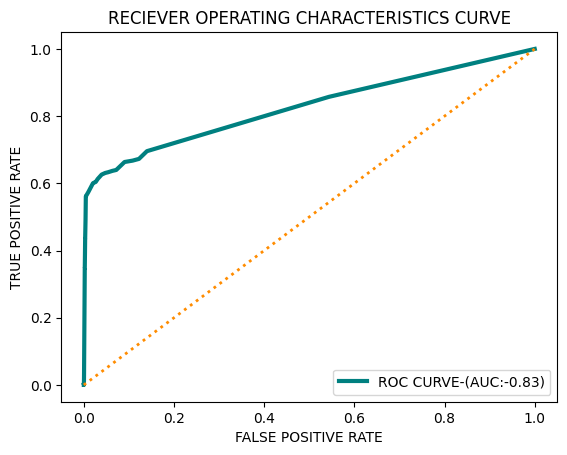

In [ ]:
plt.plot(fpr_xgb,tpr_xbg, color='teal',lw=3,label=f"ROC CURVE-(AUC:-{roc_auc_xgb:.2f})")

#plots the diagonal line representing a random classifier. It goes from the  (0, 0) to (1, 1)
plt.plot([0,1],[0,1],lw=2,linestyle="dotted",color="darkorange")
plt.xlabel("FALSE POSITIVE RATE")
plt.ylabel("TRUE POSITIVE RATE")
plt.title("RECIEVER OPERATING CHARACTERISTICS CURVE")
plt.legend(loc="lower right")
plt.show()

**Area Under the ROC Curve (AUC-ROC) ranges from 0 to 1, where 0.5 represents a random classifier and 1 represents a perfect classifier**

>AUC value of **0.83** indicates a good classifier.*The higher the AUC, the better the model's ability to discriminate between positive and negative cases.*

From above plot we can observe best threshold which classify (0 & 1) better is nearest to 1 and farthest from diagnol. Which we can estimate to be or near

**~0.76**

____________________________________________________________________________________________________________________________________________________________________________

## Sql Query Part

**Connecting to database for SQL Query Execution**

In [ ]:
import duckdb

# DuckDB setup
conn = duckdb.connect()

In [ ]:
conn.register("cov_sql",cov_sql)

### ∘ ***number of corona patients who faced shortness of breath.***

In [ ]:
print("Number of positively reported patient with Shortness of breath is")
print()
conn.execute("select count(*) as number  from cov_sql where Shortness_of_breath = 'True' and Corona = 'positive'").fetchdf()


Number of positively reported patient with Shortness of breath is



,number
0,1164


**Number positively reported people with Shortness of breath are :- 1164**

### ∘ ***number of negative corona patients who have fever and sore_throat.***

In [ ]:
print("Number of negatively reported patient with fever and soreness in throat are")
print()
conn.execute("select count(*) as number from cov_sql where Fever ='True' and Sore_throat = 'True' and Corona ='negative' ").fetchdf()

Number of negatively reported patient with fever and soreness in throat are



,number
0,121


**Number of negatively reported patient with fever and soreness in throat are :-121**

### ∘ ***Grouping the data by month and rank the number of positive cases.***

In [ ]:
conn.execute("select format(Test_date,'%M') as Date ,count(*) as num_positive_cases, rank() over(order by num_positive_cases desc) as Rank from cov_sql where Corona='positive' group by Date ").fetchdf()

,Date,num_positive_cases,Rank
0,31-03-2020,730,1
1,01-04-2020,682,2
2,02-04-2020,615,3
3,30-03-2020,612,4
4,26-03-2020,544,5
5,27-03-2020,516,6
6,03-04-2020,516,6
7,05-04-2020,505,8
8,25-03-2020,488,9
9,07-04-2020,483,10


### ∘ ***number of female negative corona patients who faced cough and headache.***

In [ ]:
conn.execute("select count(*) as Number_of_females from cov_sql where Sex='female' and Corona='negative' and Headache='True' and Cough_symptoms='True' ").fetchdf()

,Number_of_females
0,60


**Number of females faced cough and headache are :-60**

### ∘ ***Number of elderly corona patients have faced breathing problems***

In [ ]:
print("Number of Elderly people Who are tested positive and face Shortness_of_breath")
print()
conn.execute("select count(*) as People_above_60 from cov_sql where Corona='positive' and Age_60_above='Yes' and Shortness_of_breath='True' ").fetchdf()

Number of Elderly people Who are tested positive and face Shortness_of_breath



,People_above_60
0,263


**Number of Elderly people Who are tested positive and face Shortness_of_breath:-263**


In [ ]:
print("Number of Elderly people who were diagnosed and face Shortness_of_breath")
print()
conn.execute("select count(*) as People_above_60 from cov_sql where  Age_60_above='Yes' and Shortness_of_breath='True' ").fetchdf()

Number of Elderly people who were diagnosed and face Shortness_of_breath



,People_above_60
0,287


### ∘ ***Three symptoms which were more common among COVID positive patients***

In [ ]:
conn.execute("select count(*) as Negative_Patient_count, sum(cast(Cough_symptoms as int)) as  cough , sum(cast(Fever as int)) as fever, sum(case when Headache='True' then 1 else 0 end) as headache,sum(case when Sore_throat='True' then 1 else 0 end) as throat_soreness,  sum(cast(Shortness_of_breath  as int)) as breath_shortness from cov_sql where Corona='positive' group by Corona").fetchdf()


,Negative_Patient_count,cough,fever,headache,throat_soreness,breath_shortness
0,14729,6584.0,5559.0,2235.0,1526.0,1164.0


**We can observe among POSITIVELY reported people, 3 Symptoms WHICH ARE commonly faced by people are -**
>>*HEADACHE(~2235)* ,*FEVER(~5559)* ,*COUGH(~6584)*

In [ ]:
top_factor= cov_sql[cov_sql["Corona"]=='positive'][['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache']].sum()

top_factor.sort_values(ascending=False).head(3)

Cough_symptoms    6584
Fever             5559
Headache          2235
dtype: object

### ∘ ***symptom which was less common among COVID negative people***




In [ ]:
#using case statement to fetch sum of each symptom where Value is True(i.e, 1 else False(0)) and cast function for similar approach
conn.execute("select count(*) as Negative_Patient_count , sum(case when Headache='True' then 1 else 0 end) as headache,sum(case when Sore_throat='True' then 1 else 0 end) as throat_soreness,  sum(cast(Shortness_of_breath  as int)) as breath_shortness, sum(cast(Fever as int)) as fever, sum(cast(Cough_symptoms as int)) as  cough from cov_sql where Corona='negative' group by Corona").fetchdf()


,Negative_Patient_count,headache,throat_soreness,breath_shortness,fever,cough
0,260227,148.0,366.0,385.0,15816.0,34987.0


**WE can observe among negatively reported people, Symptom-** *HEADACHE* **is less commonly(~148) faced by individual**

**The most common symptom among negatively reported persons is-** *COUGH*

### ∘ ***The most common symptoms among COVID positive males whose known contact was abroad***

In [ ]:
#here cast the feature dtype from boolean value(True,False) to int(1,0).
conn.execute("select count(*) as count , sum(cast(Headache as int)) as headache,sum(cast(Sore_throat as int)) as throat_soreness,  sum(cast(Shortness_of_breath  as int)) as breath_shortness, sum(cast(Fever as int)) as fever, sum(cast(Cough_symptoms as int)) as  cough from cov_sql where Corona='positive' and Sex='male' and Known_contact='abroad' group by Corona, Sex,Known_contact").fetchdf()


,count,headache,throat_soreness,breath_shortness,fever,cough


In [ ]:
cov_sql[(cov_sql["Sex"]=='male') & (cov_sql["Corona"]=='positive')&(cov_sql["Known_contact"]=="abroad")]

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact


________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

>># Conclusion

1.Provided CSV file contain 2,78,848 entries and 11 features.

_________________________________________________________________________________

2.Number of sample collected of females is higher than males.Also number of negatively reported people are higher than positively reported people.

__________________________________________________________________________________________________________

3.Number of positively reported *males* are higher than positively reported *females*.

_________________________________________________________________________________________________
4.Given set contain confirm presence of samples  (~45.6%) of people below age 60. Which maybe comparises of those people who supposed to be outside for certains errands.

__________________________________________________________________________________

5.Set contain symptoms like ['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache']. A big bulk of people reported negative didn't faced any of these symptoms.
>In contrast number people reported positive and faced above mentioned symptoms are noticeably less than those don't faced and reported positive.

_________________________________________________________________________________________________

6.We can clearly dataset contain  record of sample collection from date    **"11 March,2020"** to **31 April,2020".**

__________________________________________________________________________________________________________________________________



7.Considering distribution and spread in data -**Random_Forest & XGBoost** model are taken. Given the versitality, handling large data and merit of penalizing the error squentailly make them suitable.

__________________________________________________________________________________________________

8.Using Hyperparameter tuning such as 'Random_search_CV" and "K-fold Cross_validation_Score" come useful in improving overall 'RECALL' score (threshold of checking the ability of model to predict True instances)of ***XGBoost*** model.

____________________________________________________________________________________________________


9.Most of number of samples (730) were collected on date-"31 March,2020". Followed by date-'01 April,2020'.
While on date-"14 March,2020" least number (38) of  samples were collected.

____________________________________________________________________________________________________________________

10.In given set values there are no male and female who faced any of symptoms, reported positive and came from "Abroad".

_________________________________________________________________________________________________________


>>### Overall Impact:

**In conclusion, this project has significantly contributed to the understanding and prediction of COVID-19 based on symptoms. By leveraging machine learning techniques and thorough data analysis, we have try to developed a good robust Machine Learning Models that demonstrate high accuracy in predicting COVID-19 outcomes based on symptoms.**












***THANK YOU :-)***